In [1]:
import numpy as np
from TDD2.TDD import Ini_TDD,Clear_TDD,set_index_order,get_tdd,get_count
from TDD2.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD2.TDD_Q import reshape as reshape2
from TDD2.TN import Index,Tensor,TensorNetwork

from qiskit import QuantumCircuit
from sympy import *
from sympy.parsing.sympy_parser import parse_expr
from TDD2.TDD import get_unique_table_num as gu1
from TDD2.BDD import get_unique_table_num as gu2
from TDD2.BDD import get_count as B_get_count

import time ,random, csv


In [2]:
from TDD2.TDD import TDD
def global_norm(tdd):
    node=tdd.node
    weight=tdd.weight

    if node.key==-1:
        return tdd

    h=weight
    tdd_list=[]
    for i in range (len(node.out_weight)):
        tdd_list.append(TDD(node.successor[i]))
        tdd_list[i].weight=h*node.out_weight[i]
        tdd_list[i]=global_norm(tdd_list[i])

    from TDD2.TDD import normalize
    new_tdd=normalize(node.key,tdd_list)
    return new_tdd

In [3]:
def simulation_cir(cir,symbolic=True,output_file=None):
    tn,indices=cir_2_tn(cir)
    if symbolic:
        for k in range(tn.qubits_num):
            x_k='x'+str(k)
            xn_k='xn'+str(k)
            s=Symbol(x_k)
            ns=Symbol(xn_k)
            U=np.array([ns,s])
            # U=np.array([0,1])
            temp_ts=Tensor(U,[Index(x_k)])
            tn.tensors.insert(0,temp_ts)
            if not x_k in indices:
                indices.append(x_k)
    t_start=time.time()
    Ini_TDD(indices,n=300)
    tdd,Max_node_num=tn.cont(max_node=True)
    Time=time.time()-t_start
    # print('Benchmark Name:',input_file)
    # print('Time:',time.time()-t_start)
    # print('Qubit num.:',tn.qubits_num)
    # print('Gate num.:',len(cir.data))
    # print('Node num. max:',Max_nodes[0])
    # print('Node num. final:',tdd.node_number())
    # print('gu1:',gu1())
    # print('gu2:',gu2())
    if output_file:
        with open(output_file, 'a', newline='') as csvfile:
            fieldnames = ['Benchmark Name', 'Qubit num.','Gate num.','Time','Node num. max','Node num. final','gu1','gu2']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writerow({'Benchmark Name':input_file,
            'Qubit num.':tn.qubits_num,
            'Gate num.':len(cir.data),
            'Time':Time,
            'Node num. max':Max_node_num,
            'Node num. final':tdd.node_number(),
            'gu1':gu1(),
            'gu2':gu2()})
    return tdd

In [4]:

def toffoli_decom(n):
#     qr = QuantumRegister(2*n-1)
    qc=QuantumCircuit(2*n-1)
#     qr=qc.qregs[0]
    qc.ccx(0,1,4)
#     qc.cx(1,0)
#     qc.ccx(2,3,n)
#     qc.barrier(qr)
    for q in range(2,n):
        qc.ccx(q,q+n-2,q+n-1)
#         qc.barrier(qr)
    for q in range(n-2,1,-1):
        qc.ccx(q,q+n-2,q+n-1)
#         qc.barrier(qr)
    if n>2:
        qc.ccx(0,1,n)        
    return qc

def toffoli_decom2(n):
#     qr = QuantumRegister(2*n-1)
    qc=QuantumCircuit(2*n-1)
#     qr=qc.qregs[0]
    qc.ccx(2*n-2,2*n-3,2*n-4)

    for q in range(2,n):
        qc.ccx(2*n-2-q,2*n-2-(q+n-2),2*n-2-(q+n-1))
#         qc.barrier(qr)
    for q in range(n-2,1,-1):
        qc.ccx(2*n-2-q,2*n-2-(q+n-2),2*n-2-(q+n-1))
#         qc.barrier(qr)
    if n>2:
        qc.ccx(2*n-2-0,2*n-2-1,2*n-2-n)        
    return qc

n=4
cir=toffoli_decom2(n)

cir.draw()

┌───┐          
q_0: ──────────┤ X ├──────────
          ┌───┐└─┬─┘┌───┐     
q_1: ─────┤ X ├──■──┤ X ├─────
          └─┬─┘  │  └─┬─┘┌───┐
q_2: ───────■────┼────■──┤ X ├
            │    │    │  └─┬─┘
q_3: ───────┼────■────┼────┼──
     ┌───┐  │         │    │  
q_4: ┤ X ├──■─────────■────┼──
     └─┬─┘                 │  
q_5: ──■───────────────────■──
       │                   │  
q_6: ──■───────────────────■──

In [5]:
tdd1=simulation_cir(cir)

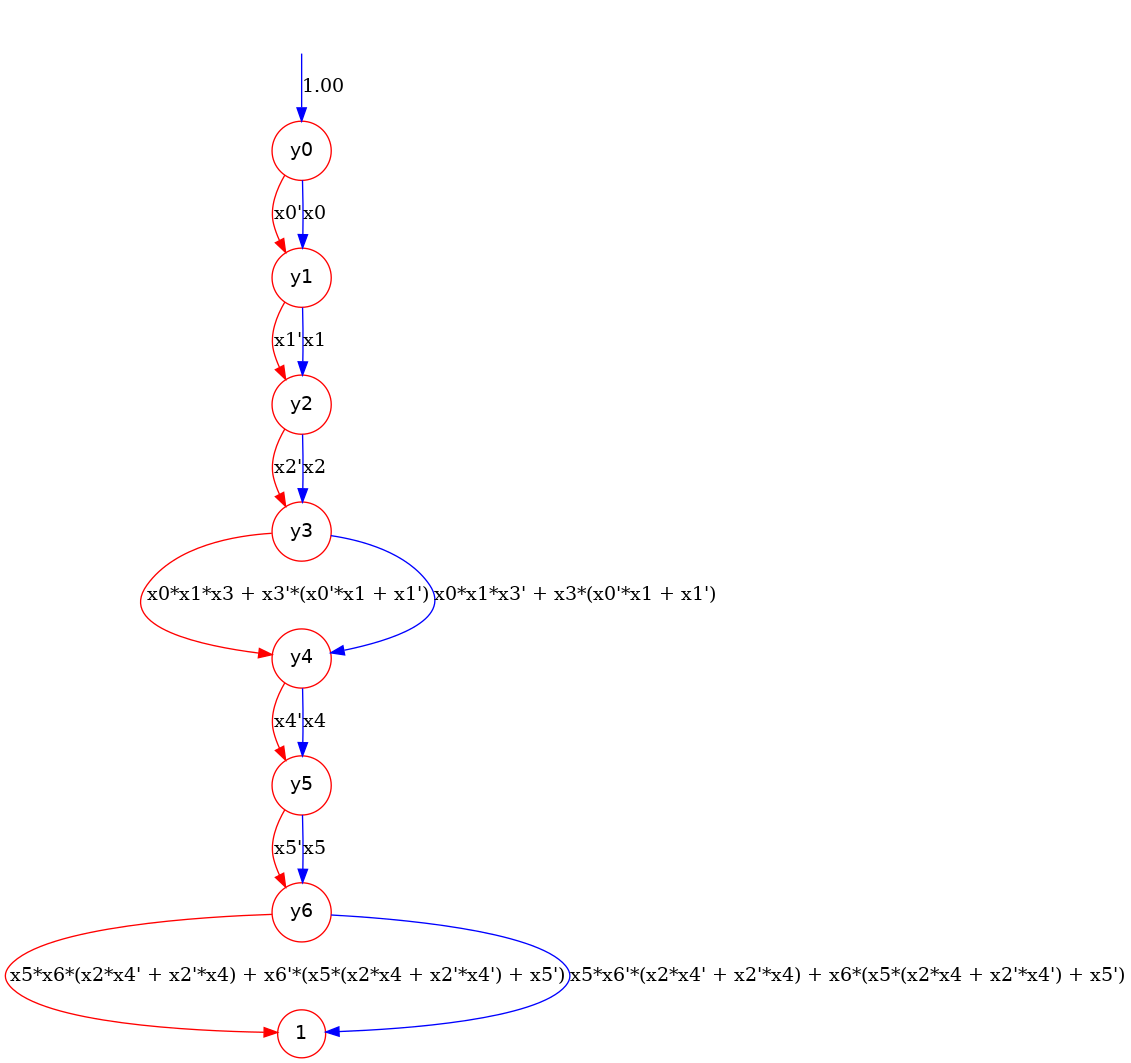

In [6]:
tdd1.show()

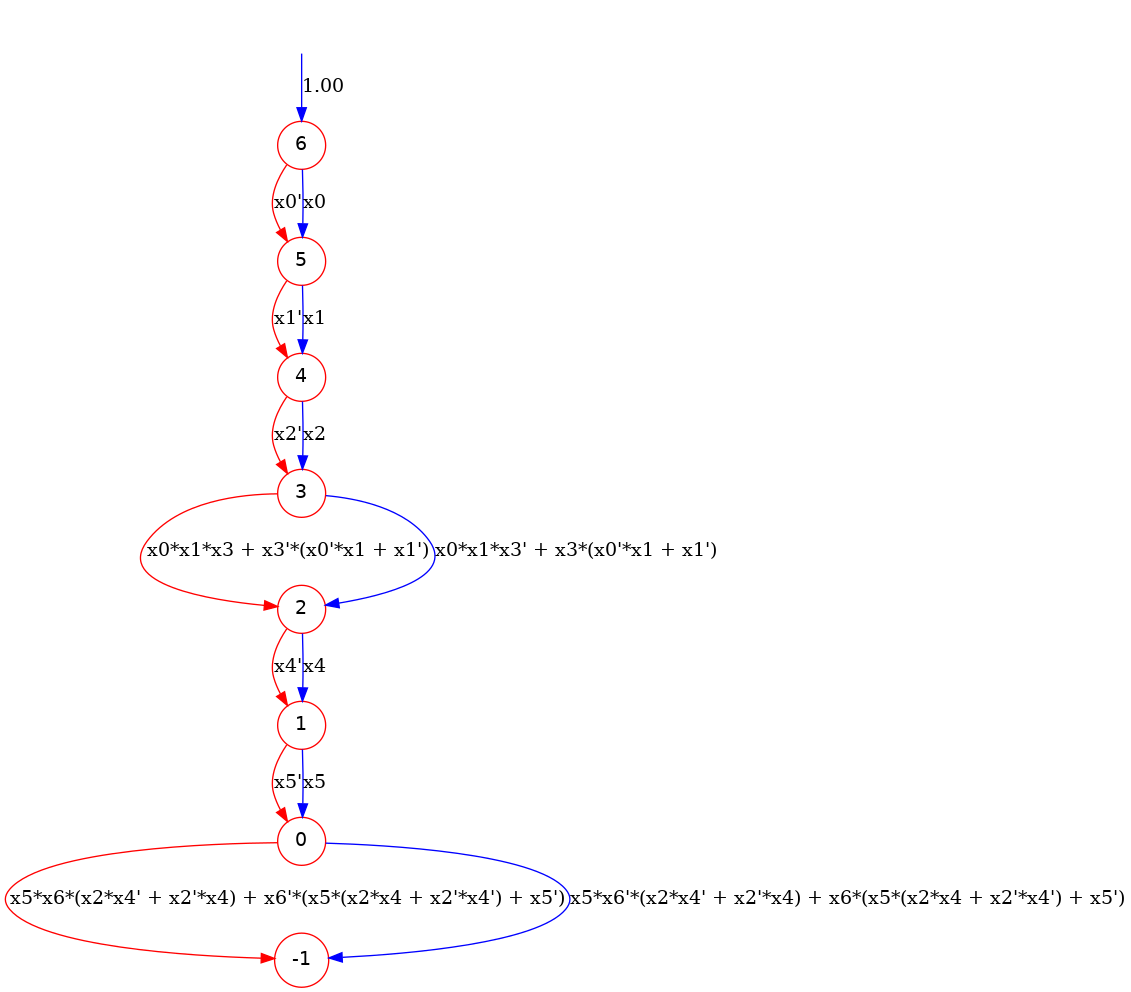

In [7]:
tddn=global_norm(tdd1)
tddn.show()